# Equilíbrio de fases envolvendo substâncias puras.

A estabilidade das fases pode ser descrita pela entropia de cada fase: $ ( \frac{\partial μ}{\partial T} )_p = -S_m   $.
Como $S_{m,sol} < S_{m,l} << S_{m,g} $, obtemos o seguinte gráfico:

<img src="eq-fases-ebook.png" alt="eq_fase"  width="500px">

<img src="diagrama-fase-co2.jpeg"  style="width:500px;heigth:500px"/> 

O coeficiente angular da curva de p versus T, $ \frac{dp}{dT} $, na região bifásica pode ser calculado pela equação de Clapeyron  $ \frac{dp}{dT} $ =  $ \frac{\Delta S}{\Delta V} $. Para mudanças de estado reversíveis podemos fazer $\Delta S = \frac{\Delta H}{T} $ . 

A equação de Clayperon pode ser resolvida para as três regiões bifásicas: sólido-líquido, sólido-vapor, e líquido-vapor. 
A integração na região de equilíbrio sólido-líquido, considerando um pequeno intervalo de temperaturas e $ \Delta _{fus}H $ é constante neste intervalo, nos leva a equação:
$$p_2 – p_1 = \frac{\Delta _{fus}H}{\Delta_{fus} V}  ln(\frac{T_2}{T_1})$$

A integração nas regiões de sólido-vapor e líquido-vapor retornam equações similares, sendo o único termo diferente as entalpias de fusão e sublimação:

$ ln(\frac{p_2}{p_1}) = \frac{\Delta _{vap}H}{R} (\frac{1}{T_2} - \frac{1}{T_1}) $ líquido-vapor

$ ln(\frac{p_2}{p_1}) = \frac{\Delta _{sub}H}{R} (\frac{1}{T_2} - \frac{1}{T_1}) $ sólido-vapor


In [1]:
# Tudo começa com a importação dos módulos necessários para fazer as contas
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1) 
Use os dados abaixo de temperatura-pressão de vapor para determinar $\Delta_{sub} Hº$, $\Delta_{vap} Hº$ e $\Delta_{fus} Hº$ para a água a 0ºC:

Gelo

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|p/torr | 3.880 | 4.045 | 4.217 | 4.395 | 4.579
|T/ºC | -2.0 | -1.5 | -1.0 | -0.5 | 0.0

Água

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
|p/torr | 4.579 | 4.750 | 4.926 | 5.107 | 5.294
|T/ºC | 0.0 | 0.5 | 1.0 | 1.5 | 2.0

### Solução:
De acordo com a integração  da equação de Clayperon ($ \ln(\frac{p_2}{p_1}) = - \frac{\Delta_{vap} Hº}{R} \times (\frac{1}{T_2}-\frac{1}{T_1})$, um gráfico de ln(P) contra 1/T deve ser linear e apresentar coeficiente angular igual a - $\frac{\Delta Hº}{R}$.
Resolvendo inicialmente para o gelo:

In [2]:
# Definindo os vetores que serão plotados
# Resolvendo para o gelo

p = np.array([  3.880 , 4.045 , 4.217 , 4.395 , 4.579])
t_celsius = np.array([ -2.0 , -1.5 , -1.0 , -0.5 , 0.0]) 
T = 273 + t_celsius

lnP = np.log(p)
iT = 1/T

#regressão linear
deg = 1
z = np.polyfit(iT, lnP, deg)
y = np.poly1d(z)

DH_sub = -8.314*z[0] # calculando deltaH de sublimação

print('coeficiente angular = ' + format(z[0] , ' 6.5f'))  
print('coeficiente linear = ' + format(z[1] , ' 6.5f'))  
print('entalpia de sublimação (J/*mol)= ' + format(DH_sub , ' 6.5f'))  

coeficiente angular = -6129.91617
coeficiente linear =  23.97549
entalpia de sublimação (J/*mol)=  50964.12304


Faremos a construção do gráfico de p versus T para fins didáticos. Desta forma fica mais fácil visualizar que a equação obtida descreve uma reta de ln(p) em fundção de 1/T.

<function matplotlib.pyplot.show(*args, **kw)>

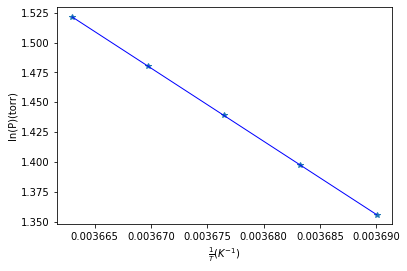

In [3]:
plt.plot(iT,lnP,'*')
plt.plot(iT,y(iT), color='blue', linewidth=1)
plt.xlabel(r'$\frac{1}{T} (K^{-1} )$')
plt.ylabel('ln(P)(torr)')
plt.show

In [4]:
# Resolvendo para água 
#Definindo os vetores que serão plotados

p = np.array([  4.579 , 4.750 , 4.926 , 5.107 , 5.294])
t_celsius = np.array([ 0.0 , 0.5 , 1.0 , 1.5 , 2.0]) 
T = 273 + t_celsius

lnP = np.log(p)
iT = 1/T

#regressão linear
deg = 1
z2 = np.polyfit(iT, lnP, deg)
y1 = np.poly1d(z2)
DH_vap = -8.314*z2[0] # calculando deltaH de vaporização

print('coeficiente angular = ' + format(z2[0] , ' 6.5f'))  
print('coeficiente linear = ' + format(z2[1] , ' 6.5f'))  
print('entalpia de vaporização (J/*mol)= ' + format(DH_vap , ' 6.5f'))  

coeficiente angular = -5445.28900
coeficiente linear =  21.46772
entalpia de vaporização (J/*mol)=  45272.13274


Novamente faremos a construção do gráfico de p versus T para fins didáticos. Desta forma fica mais fácil visualizar que a equação obtida descreve uma reta de ln(p) em fundção de 1/T.

<function matplotlib.pyplot.show(*args, **kw)>

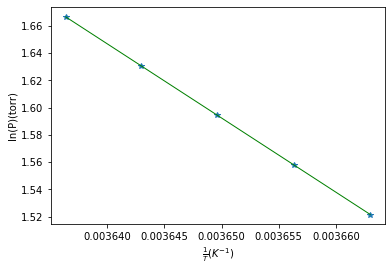

In [5]:
plt.plot(iT,lnP,'*')
plt.plot(iT,y1(iT), color='green', linewidth=1)
plt.xlabel(r'$\frac{1}{T} (K^{-1})$')
plt.ylabel('ln(P)(torr)')
plt.show

Sabendo que: $ \Delta_{sub} Hº = \Delta_{vap} Hº + \Delta_{fus} Hº$ 

In [6]:
DH_fus = DH_sub - DH_vap
print('entalpia de fusão (J/mol)= ' + format(DH_fus , ' 6.5f'))  

entalpia de fusão (J/mol)=  5691.99029


A partir das entalpias obtidas, vamos construiir um gráfico onde as equações apra o equilíbrio líquido-vapor e sólido-vapor são plotadas em conjunto. O ponto onde as curvas se encontram é a condição de T e p de equilíbrio de fases. Em temperaturas abaixo de 273 K a curva do sólido apresenta menor pressão de vapor, logo, este estado é mais estável nesta faixa de temperaturas. Acima de 273 K, a curva do líquido é mais estável, indicando que o líquido é mais estável em temperaturas superiores a 273 K.

<function matplotlib.pyplot.show(*args, **kw)>

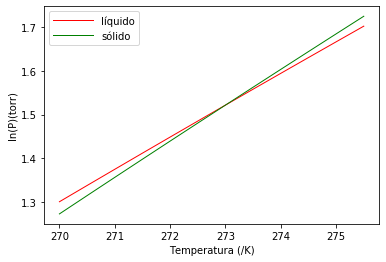

In [7]:
#Criando um intervalo de temperaturas que se inicia em 270 K e termina em 276 K.
#O intervalo de valores é 0.5K. 

T = np.arange(270,276,0.5) #criando um intervalo de temperaturas
iT = 1/T

#Gráfico do líquido-vapor
plt.plot(T,y1(iT), color='red', linewidth=1,label='líquido')

#Gráfico do sólido-vapor
plt.plot(T,y(iT), color='green', linewidth=1,label='sólido')

plt.xlabel('Temperatura (/K)')
plt.ylabel('ln(P)(torr)')
plt.legend(handlelength=4,loc='best')
plt.show